# Subplots and Advanced Plotting using Seaborn

## Introduction to Seaborn
Seaborn is a powerful Python library built on top of Matplotlib that simplifies the creation of complex visualizations. It integrates well with Pandas and offers additional functionality

### Importing Seaborn:

In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp313-cp313-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl (2.6 MB)
U

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---

## Creating Subplots and Multiple Plots on the Same Graph

### Subplots Using Seaborn and Matplotlib
Subplots allow you to visualize multiple plots within a single figure.

#### Example 1: Pairwise Scatter Plots (Using Iris Dataset)

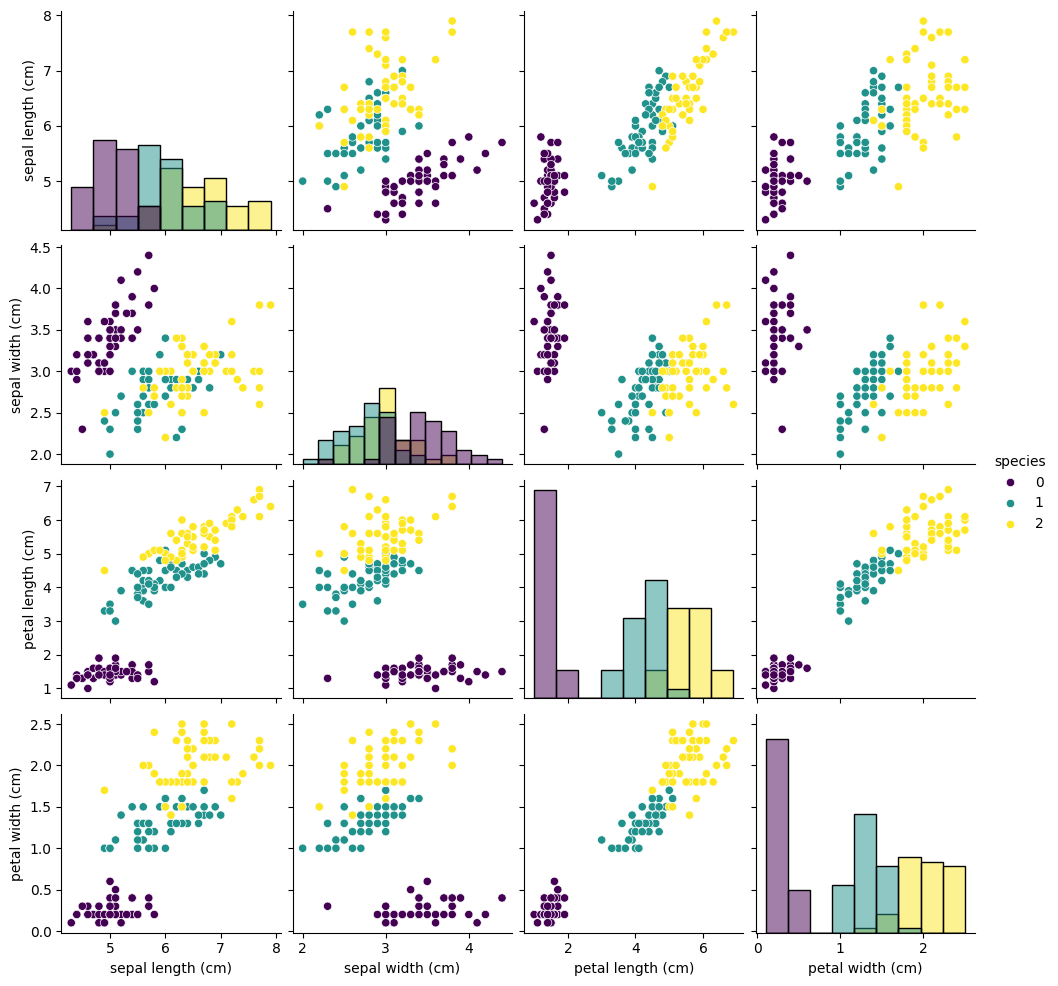

In [7]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Pair plot
sns.pairplot(iris_df, hue='species', diag_kind='hist', palette='viridis')
plt.show()

#### Example 2: Subplots for Survival Analysis (Titanic Dataset)

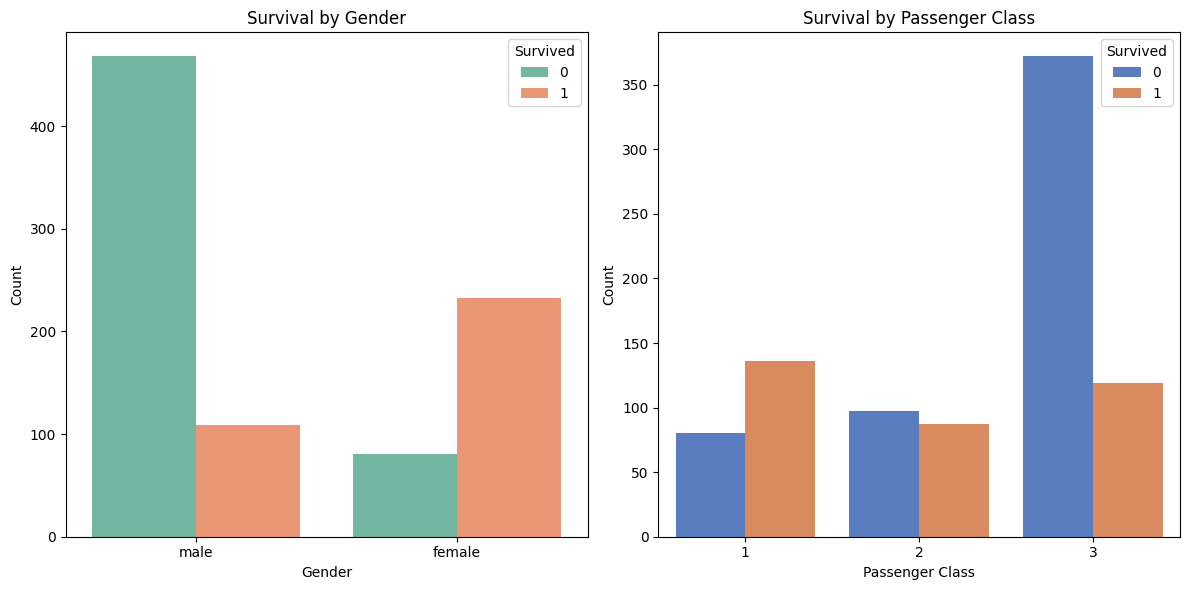

In [8]:
# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=data, ax=axes[0], palette='Set2')
axes[0].set_title("Survival by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

# Plot 2: Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[1], palette='muted')
axes[1].set_title("Survival by Passenger Class")
axes[1].set_xlabel("Passenger Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

---

### Advanced Multi-Plot Layouts Using `sns.FacetGrid`
`FacetGrid` allows you to create a grid of plots based on categorical variables.

#### Example: Grid of Plots by Gender

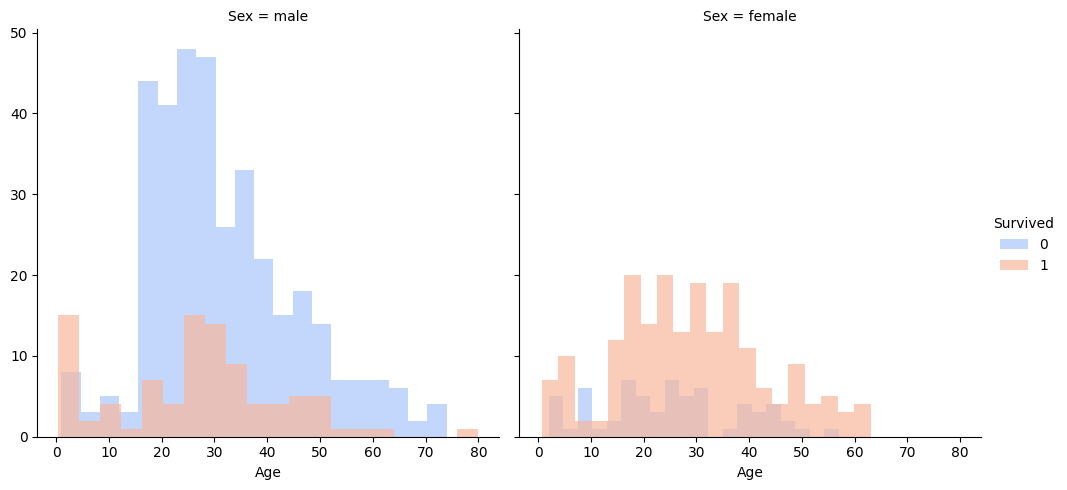

In [15]:
# FacetGrid example
facet = sns.FacetGrid(data, col="Sex", hue="Survived", height=5, palette='coolwarm')
facet.map(plt.hist, "Age", bins=20, alpha=0.7)
facet.add_legend()
plt.show()

#### Example: Scatter Plot Grid by Species (Using Iris Dataset)

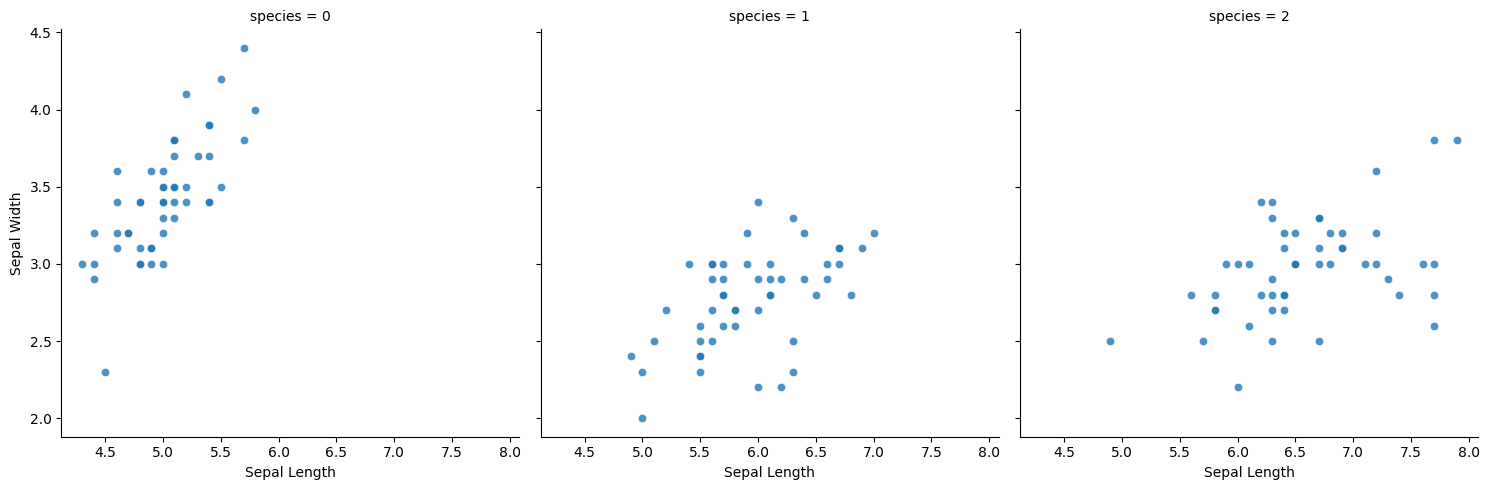

In [16]:
# FacetGrid with scatter plots
facet = sns.FacetGrid(iris_df, col="species", height=5, aspect=1)
facet.map(sns.scatterplot, "sepal length (cm)", "sepal width (cm)", alpha=0.8)
facet.set_axis_labels("Sepal Length", "Sepal Width")
plt.show()

---

## Hands-On: Design Advanced Multi-Plot Layouts

### Task 1: Titanic Dataset
Create a grid of plots showing the distribution of fare prices for different passenger classes and survival status.

#### Starter Code:

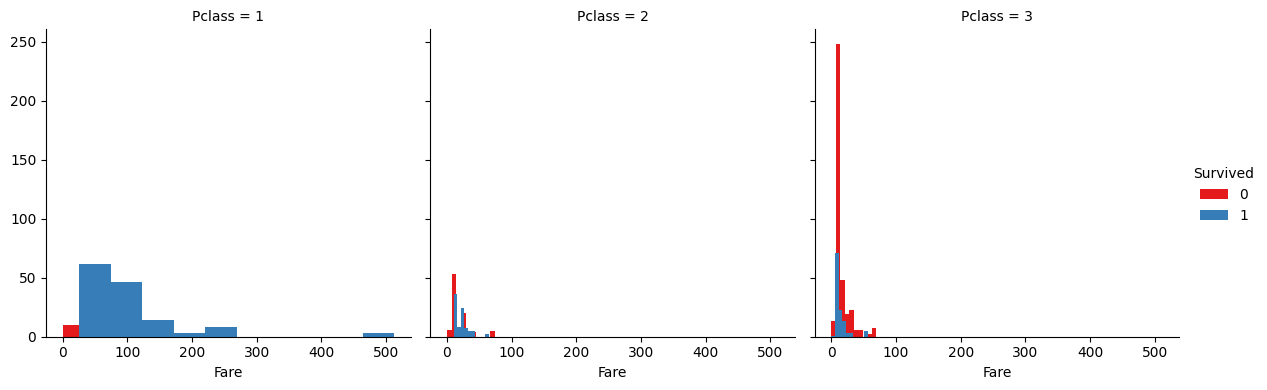

In [22]:
# FacetGrid: Fare distribution by class and survival
facet = sns.FacetGrid(data, col="Pclass", hue="Survived", height=4, palette='Set1')
facet.map(plt.hist, "Fare")
facet.add_legend()
plt.show()

### Task 2: Iris Dataset
Create a multi-plot layout showing scatter plots of petal dimensions for each species, and add regression lines.

#### Starter Code:

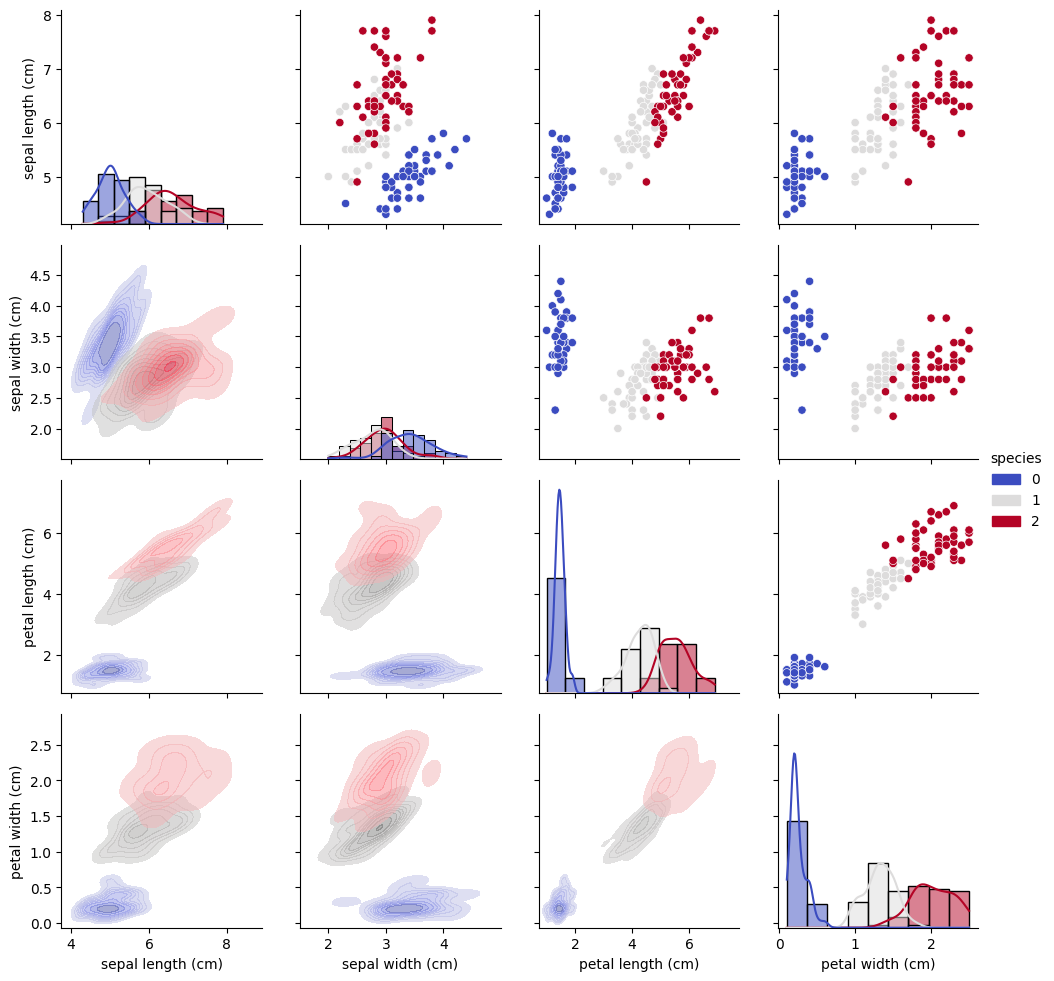

In [25]:
# PairGrid with regression lines
pair_grid = sns.PairGrid(iris_df, hue="species", palette="coolwarm")
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_lower(sns.kdeplot, fill=True, alpha=0.5)
pair_grid.map_diag(sns.histplot, kde=True)
pair_grid.add_legend()
plt.show()

---